# Research Question 1
* Create a plot where each point (x,y) represents the number of points obtained by team x at game week y
* Highlight the two teams that got the longest winning streak, and the two teams that got the longest losing streak.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import sys
import matplotlib

### To solve the question we need information concerning only matches and teams.

In [3]:
matches = pd.read_json("..\data\hw2\matches_England.json")
teams = pd.read_json("teams.json")
matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


### For every match, we need to extract the data concerning the two teams involved.
This is done by converting the right column to a DataFrame, as it appears as a Dictionary

In [4]:
user_dict = matches['teamsData'].to_dict()
data = pd.DataFrame.from_dict({(i,j): user_dict[i][j] 
                           for i in user_dict.keys() 
                           for j in user_dict[i].keys()},
                       orient='index')
data.head()

scoreET  coachId  side  teamId  score  scoreP  hasFormation  \
0 1646        0     8880  home    1646      1       0             1   
  1659        0     8934  away    1659      2       0             1   
1 1627        0        0  away    1627      0       0             1   
  1628        0     8357  home    1628      2       0             1   
2 1609        0     7845  away    1609      1       0             1   

                                                formation  scoreHT  
0 1646  {'bench': [{'playerId': 77502, 'ownGoals': '0'...        1  
  1659  {'bench': [{'playerId': 11061, 'ownGoals': '0'...        0  
1 1627  {'bench': [{'playerId': 399517, 'ownGoals': '0...        0  
  1628  {'bench': [{'playerId': 8501, 'ownGoals': '0',...        0  
2 1609  {'bench': [{'playerId': 7856, 'ownGoals': '0',...        1

We need to notice that the total goals scored by each team is given by the following formula (see the description of the dataset). This info is necessary to know the points gained in a gameweek by every team (win, loss, draw).

In [5]:
data['final score'] = data['score'] + data['scoreET'] + data['scoreP']
data.head()

scoreET  coachId  side  teamId  score  scoreP  hasFormation  \
0 1646        0     8880  home    1646      1       0             1   
  1659        0     8934  away    1659      2       0             1   
1 1627        0        0  away    1627      0       0             1   
  1628        0     8357  home    1628      2       0             1   
2 1609        0     7845  away    1609      1       0             1   

                                                formation  scoreHT  \
0 1646  {'bench': [{'playerId': 77502, 'ownGoals': '0'...        1   
  1659  {'bench': [{'playerId': 11061, 'ownGoals': '0'...        0   
1 1627  {'bench': [{'playerId': 399517, 'ownGoals': '0...        0   
  1628  {'bench': [{'playerId': 8501, 'ownGoals': '0',...        0   
2 1609  {'bench': [{'playerId': 7856, 'ownGoals': '0',...        1   

        final score  
0 1646            1  
  1659            2  
1 1627            0  
  1628            2  
2 1609            1

Here we clean the data, keeping only the columns needed.

In [6]:
data.drop(columns=['scoreET','coachId','side','score','scoreP','hasFormation','formation','scoreHT'],
           inplace=True)

In [7]:
length = len(data['teamId'])
data.index = range(length)
data.head()

,teamId,final score
0,1646,1
1,1659,2
2,1627,0
3,1628,2
4,1609,1


### Calculating the points for wins (+3), losses (0) and draws (+1) for every match and team

In [8]:
def pts_from_scores(score1,score2):
    if score1 > score2:
        return [3,0]
    if score1 < score2:
        return [0,3]
    return [1,1]

In [9]:
for i in range(0, length-1, 2):
    pts1, pts2 = pts_from_scores(data.iloc[i]['final score'], data.iloc[i+1]['final score'])
    data.loc[i,'points'] = pts1
    data.loc[i+1,'points'] = pts2

In [10]:
data.drop(columns=['final score'],inplace=True)

### Creating a Dictionary from the teams dataset
This is useful to extract the team names using the *wyId*s as keys.

In [11]:
teams.index=teams['wyId']
teams.drop(columns = ['area','city','name','type','wyId'],
          inplace=True)

In [12]:
teams = teams.T
teams

wyId,1613,692,691,696,695,3795,698,2454,1673,678,...,19314,3757,15594,4418,16521,1598,17322,6697,13869,16823
officialName,Newcastle United FC,Real Club Celta de Vigo,Reial Club Deportiu Espanyol,Deportivo Alav\u00e9s,Levante UD,Esp\u00e9rance Sportive Troyes Aube Champagne,Getafe Club de F\u00fatbol,Borussia VfL M\u00f6nchengladbach,Huddersfield Town FC,Athletic Club Bilbao,...,Senegal,Italy,Peru,France,Saudi Arabia,Spain,Serbia,Switzerland,Poland,Nigeria


In [13]:
team = pd.Series.to_dict(teams.iloc[0])

### Calculating the cumulative points relating to the weekgames

In [14]:
data['cum pts'] = data.groupby(['teamId']).cumsum()

In [15]:
data.drop(columns=['points'], inplace=True)

### Splitting the data based on teams

In [16]:
dfs = [x for _, x in data.groupby('teamId')]
tot_weeks = len(dfs[0])
dfs[0].head()

,teamId,cum pts
4,1609,3.0
26,1609,3.0
32,1609,6.0
54,1609,6.0
76,1609,9.0


In [17]:
num_teams = len(dfs)

In the following lines we adjust the labels for indexes and columns.

In [18]:
def num_week(x):
    return 'week ' + str(x)

In [19]:
for i in range(num_teams):
    dfs[i].index=list(map(num_week, list(range(1,tot_weeks+1))))
    teamname = team[dfs[i].loc['week 1','teamId']]
    dfs[i].drop(columns=['teamId'], inplace=True)
    dfs[i].columns=[teamname]

We now create the DataFrame that we need to plot, with team names as columns and game weeks as rows.

In [20]:
result = pd.concat(dfs, axis=1, sort=False)

<Figure size 1440x720 with 0 Axes>

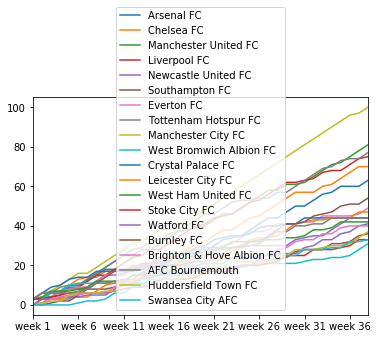

In [21]:
plt.figure(figsize=[20,10])
result.plot()